<a href="https://colab.research.google.com/github/WWeiQueen/Bioimage-Analysis/blob/main/test_blog_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Install pacakges
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the excel file as raw_df
raw_df = pd.read_excel('test_blog_Table_Danny.xlsx')

In [64]:
# show raw_df & initial graphs
raw_df.head()

,Event Date,Event Name,Event Param Name,Event Param Value (String),Acquired Medium,Acquired Source,Language,Continent,Country,City,Device Category,OS Version,Event Count
0,"Jul 4, 2023",user_engagement,page_location,https://secuxtech.com/blog,organic,google,pt-br,Americas,Brazil,Sao Paulo,desktop,Windows 10,1
1,"Jul 9, 2023",user_engagement,page_referrer,https://medium.com/fio-blog/join-the-fio-staki...,referral,medium.com,en-us,Asia,India,Jaipur,mobile,Android 10.0.0,1
2,"Jul 3, 2023",user_engagement,page_referrer,https://r.search.yahoo.com/_ylt=AwrNajW_nKJkx9...,(none),(direct),en-us,Americas,Brazil,Jundiai,desktop,Windows 11,1
3,"Jul 4, 2023",user_engagement,page_referrer,https://secuxtech.com/blog,organic,google,pt-br,Americas,Brazil,Sao Paulo,desktop,Windows 10,1
4,"Jul 6, 2023",user_engagement,page_location,https://secuxtech.com/blog,organic,google,pt-br,Americas,Brazil,Sao Paulo,desktop,Windows 10,1


In [58]:
# the number of rows
raw_df['Event Name'].value_counts(dropna=False)

user_engagement    273
Name: Event Name, dtype: int64

In [4]:
# What are the features in side raw_df
print(raw_df.columns)

Index(['Event Date', 'Event Name', 'Event Param Name',
       'Event Param Value (String)', 'Acquired Medium', 'Acquired Source',
       'Language', 'Continent', 'Country', 'City', 'Device Category',
       'OS Version', 'Event Count'],
      dtype='object')

In [20]:
# Aggregation statistics
used_cols = ['Event Param Value (String)', 'Acquired Medium', 'Acquired Source','Language', 'Continent', 'Country', 'City', 'Device Category','OS Version']
raw_df[used_cols].describe()

,Event Param Value (String),Acquired Medium,Acquired Source,Language,Continent,Country,City,Device Category,OS Version
count,273,273,273,273,273,273,168,273,273
unique,66,5,14,26,4,27,92,3,27
top,https://secuxtech.com/news-blog/,(none),(direct),en-us,Asia,Taiwan,Bacoor,desktop,Windows 11
freq,103,135,135,88,118,84,11,228,80


In [66]:
for col in used_cols:
  print(col, 'top 3 Count summary: \n', raw_df[col].value_counts().head(3), '\n\n')

Event Param Value (String) top 3 Count summary: 
 https://secuxtech.com/news-blog/                                                                                                              103
https://secuxtech.com/news-blog/?_gl=xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx     13
https://secuxtech.com/blog/crypto-wallet/                                                                                                      12
Name: Event Param Value (String), dtype: int64 


Acquired Medium top 3 Count summary: 
 (none)      135
organic     114
referral     13
Name: Acquired Medium, dtype: int64 


Acquired Source top 3 Count summary: 
 (direct)    135
google      106
bing         14
Name: Acquired Source, dtype: int64 


Language top 3 Count summary: 
 en-us    88
zh-tw    82
pt-br    30
Name: Language, dtype: int64 


Continent top 3 Count summary: 
 Asia        118
Americas    103
Europe       50
Name: Continent, dtype: int64

In [46]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


In [63]:
data = raw_df.copy()
data['Event Date'] = pd.to_datetime(data['Event Date'], errors='coerce')
data.set_index('Event Date', inplace=True)
daily_traffic_count = data.resample("D").count()
daily_traffic_count.reset_index(inplace=True)
daily_traffic_count = daily_traffic_count[['Event Date', 'Event Name']]
daily_traffic_count.rename(columns={
    'Event Date': 'ds', 'Event Name': 'count'
}, inplace=True)
print('daily_traffic_count', daily_traffic_count)
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_traffic_count['ds'], y=daily_traffic_count['count'], fill=None,
                         mode='lines+markers',
                         line_color='#2ca02c',
                         name='real_values'))

fig.show()

daily_traffic_count           ds  count
0 2023-07-03     42
1 2023-07-04     55
2 2023-07-05     50
3 2023-07-06     40
4 2023-07-07     39
5 2023-07-08     17
6 2023-07-09     30


Total Event Count: 361


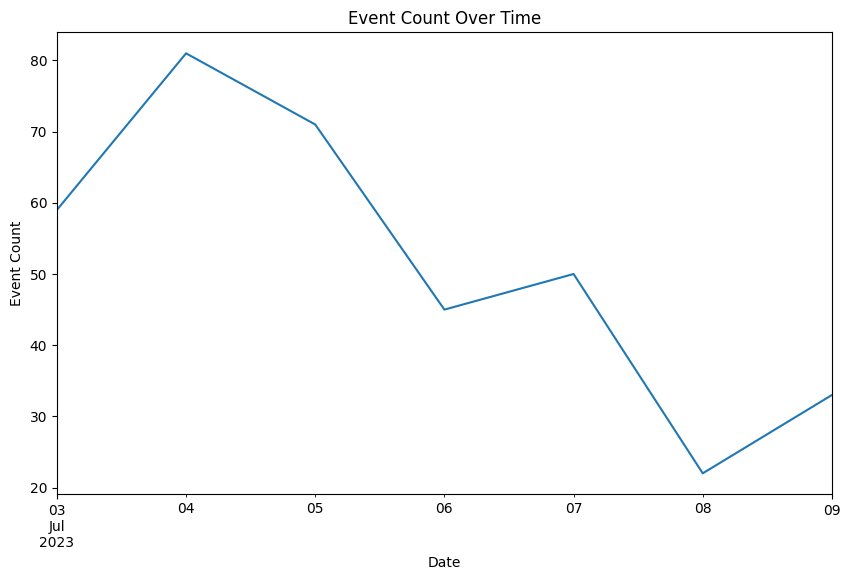

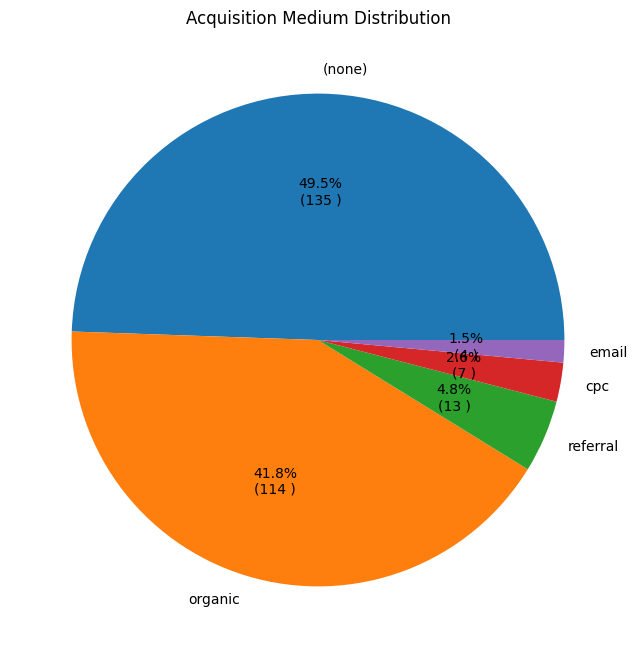

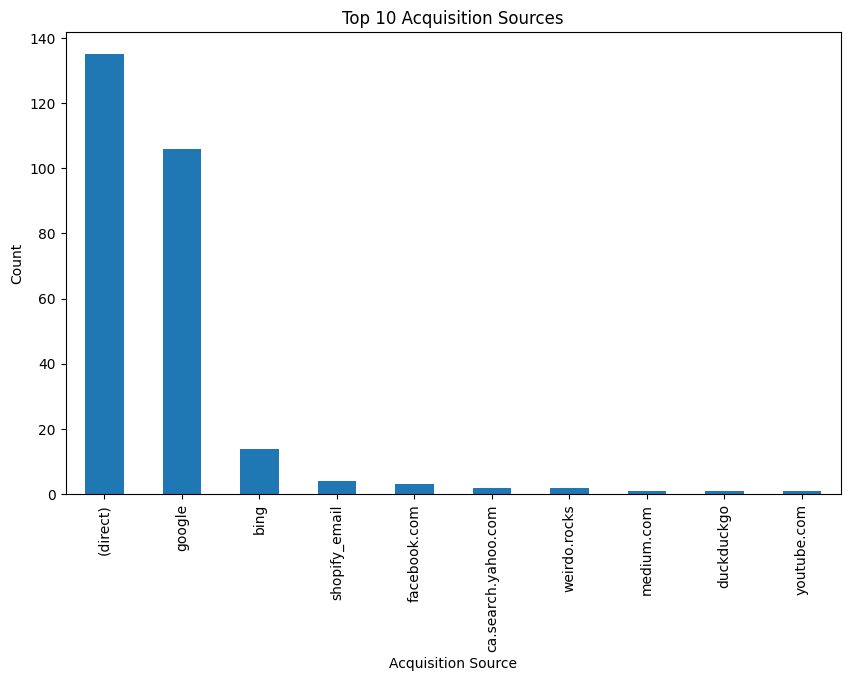

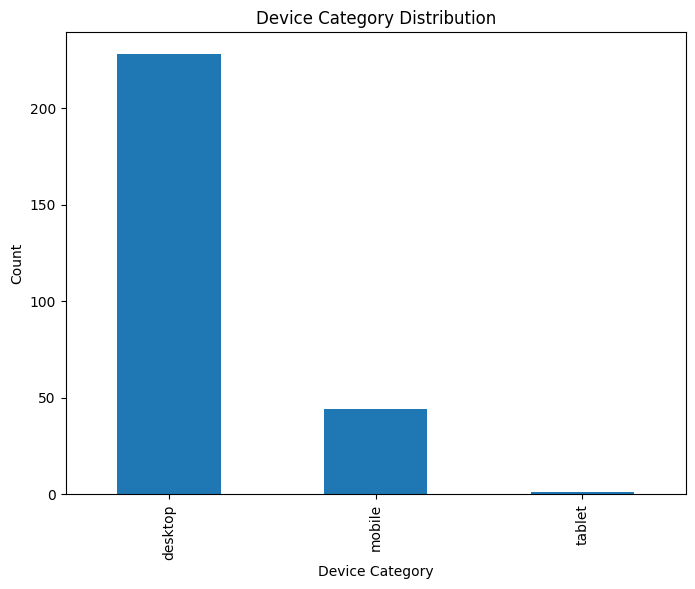

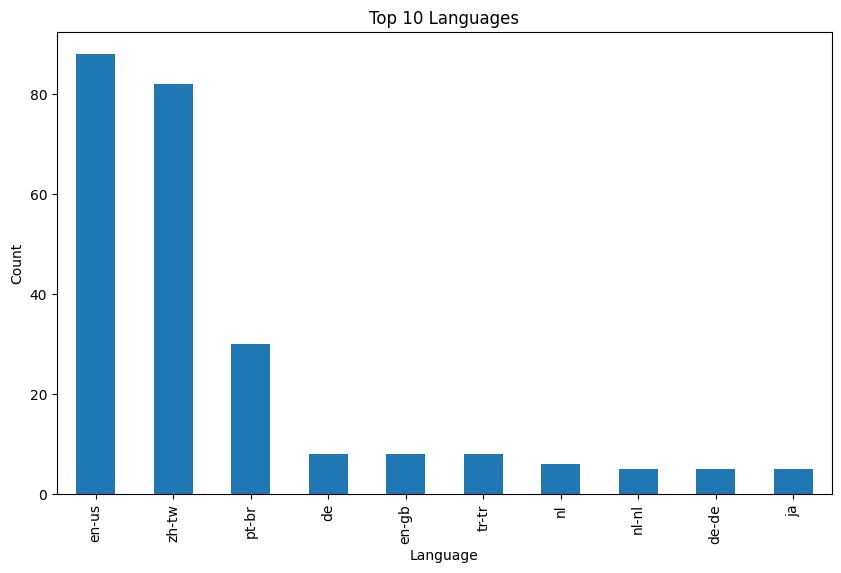

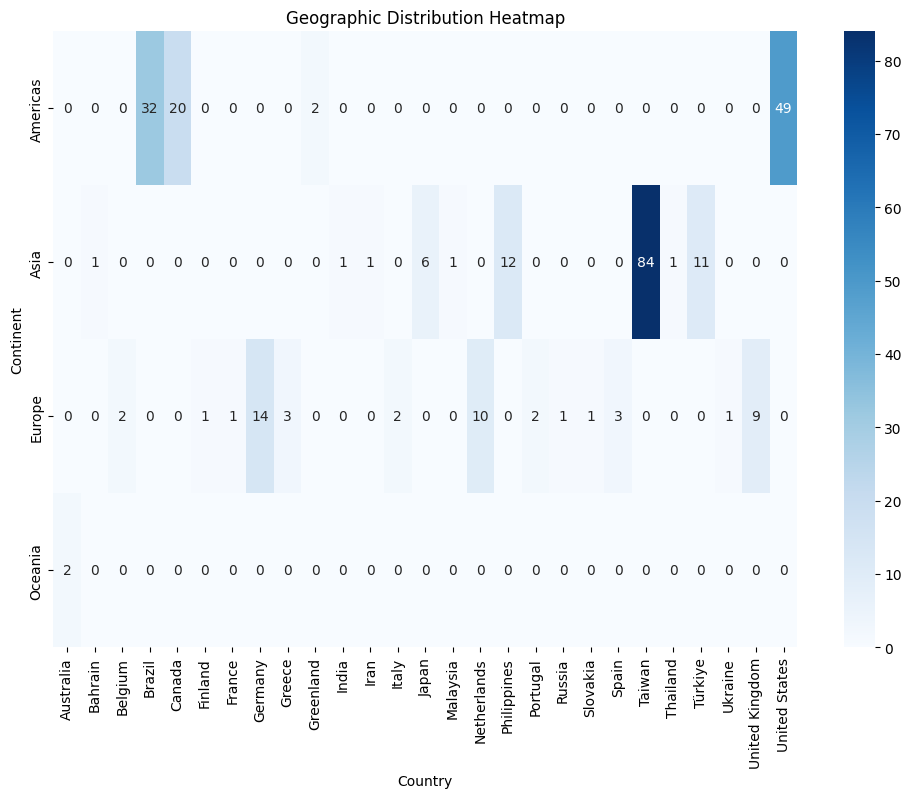

In [68]:
data = raw_df.copy()
# Convert 'Event Date' column to datetime
data['Event Date'] = pd.to_datetime(data['Event Date'])

# 1. Total Event Count
total_event_count = data['Event Count'].sum()
print('Total Event Count:', total_event_count)

# 2. Acquisition Medium and Source
acquisition_medium_count = data['Acquired Medium'].value_counts()
acquisition_source_count = data['Acquired Source'].value_counts()

# 3. Device Category
device_category_count = data['Device Category'].value_counts()

# 4. Language
language_count = data['Language'].value_counts()

# 5. Geographic Distribution
continent_count = data['Continent'].value_counts()
country_count = data['Country'].value_counts()
city_count = data['City'].value_counts()

# Visualization Graphs
# 1. Event Count Over Time (Line Graph)
plt.figure(figsize=(10, 6))
data.groupby('Event Date')['Event Count'].sum().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.title('Event Count Over Time')
plt.show()

print('\n\n')
# 2. Acquisition Medium and Source (Pie Chart)
plt.figure(figsize=(8, 8))
acquisition_medium_count.plot(kind='pie',autopct = lambda pct: func(pct, acquisition_medium_count))
plt.title('Acquisition Medium Distribution')
plt.ylabel('')
plt.show()
print('\n\n')
plt.figure(figsize=(10, 6))
acquisition_source_count.head(10).plot(kind='bar')
plt.xlabel('Acquisition Source')
plt.ylabel('Count')
plt.title('Top 10 Acquisition Sources')
plt.show()
print('\n\n')
# 3. Device Category (Bar Chart)
plt.figure(figsize=(8, 6))
device_category_count.plot(kind='bar')
plt.xlabel('Device Category')
plt.ylabel('Count')
plt.title('Device Category Distribution')
plt.show()
print('\n\n')
# 4. Language (Bar Chart)
plt.figure(figsize=(10, 6))
language_count.head(10).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 10 Languages')
plt.show()
print('\n\n')
# 5. Geographic Heatmap
geographic_data = data.groupby(['Continent', 'Country']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(geographic_data, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Geographic Distribution Heatmap')
plt.show()


# Customer Segmentation Model
-- after getting the clusters(segmentations), can do :
* Customer Profiling
* Segment-Specific Campaigns
* Product Development
* Upselling and Cross-selling
* Churn Prediction and Retention Strategies
* Customer Journey Analysis

In [48]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3097774 sha256=3d5461c9b67d585474ec15e6b0db43260e85b8020e6f41e5f522acaa6c2f27d4
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load the dataset into a DataFrame
# data = pd.read_csv('your_dataset.csv')

# Perform customer segmentation using k-means clustering
features = ['Event Count', 'Acquired Medium', 'Acquired Source']
segmentation_data = data[features].copy()

# Convert categorical variables to numerical using one-hot encoding
segmentation_data = pd.get_dummies(segmentation_data)

# Scale the features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

# Apply k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
segmentation_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
data['Segment'] = segmentation_labels

# Print the segmentation results
print(data[['Event Count', 'Acquired Medium', 'Acquired Source', 'Segment']].head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Event Count Acquired Medium Acquired Source  Segment
0            1         organic          google        0
1            1        referral      medium.com        1
2            1          (none)        (direct)        1
3            1         organic          google        0
4            1         organic          google        0


# Features to collect in future:
* Demographic Information:

    Age

    Gender

    Income Level

    Education Level

    Occupation


* Customer Behavior:

    Purchase History

    Browsing Patterns

    Time Spent on Pages

    Click-Through Rates

    Conversion Rates

    Customer Satisfaction:


* Customer Ratings
    Net Promoter Score (NPS)

    Customer Feedback

    Customer Surveys

    Customer Lifetime Value (CLV):


* Total Revenue Generated
    Repeat Purchase Frequency

    Average Order Value

    Customer Engagement:


* Time Spent on Website/App
    Frequency of Visits

    Social Media Interactions

    Email Open Rates

    Marketing Campaign Performance:


* Click-Through Rates (CTR)
    Conversion Rates

    Cost per Acquisition (CPA)

    Return on Investment (ROI)

    Customer Acquisition Cost (CAC)


* Competitor Analysis:

    Market Share

    Pricing Strategies

    Product Offerings

    Customer Reviews

    Social Media Presence


* Social Media Metrics:

    Followers

    Likes/Shares/Comments

    Engagement Rates

    Mentions/Hashtags


* Website Analytics:

    Website Traffic

    Bounce Rates

    Conversion Funnels

    Exit Pages

    User Flow


* Customer Support Interactions:

    Inquiries/Issues

    Response Times

    Resolution Rates

    Customer Feedback